# How to import, process and visualize LAS files in Jupyter Notebook - Part1

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import welly
from welly import Well
from welly import Project
welly.__version__
%config InlineBackend.figure_format='svg' # To create high resolution graphics


In [4]:
well=Well.from_las(r"E:\00 ProjectsData\100. STATIC MODEL\TALARA\02. WELLS\03. LAS - DEV\LOTE X - PETROBRAS\02. las\EA11097.LAS")

C:\Users\Kevin\anaconda3\lib\site-packages\welly\well.py:193: FutureWarning: From v0.5 the default will be 'original', keeping whatever is used in the LAS file. If you want to force conversion to metres, change your code to use `index='m'`.
  warnings.warn(m, FutureWarning)


In [5]:
well.data

{'GR': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'RESD': Curve([nan, nan, nan, ..., nan, nan, nan]),
 '&LN': Curve([nan, nan, nan, ..., nan, nan, nan]),
 '&SN': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'RESS': Curve([nan, nan, nan, ..., nan, nan, nan])}

### Extract the Common well name from the LAS file

In [17]:
well.header.name

'EA11097'

### Extract general header information from the LAS file

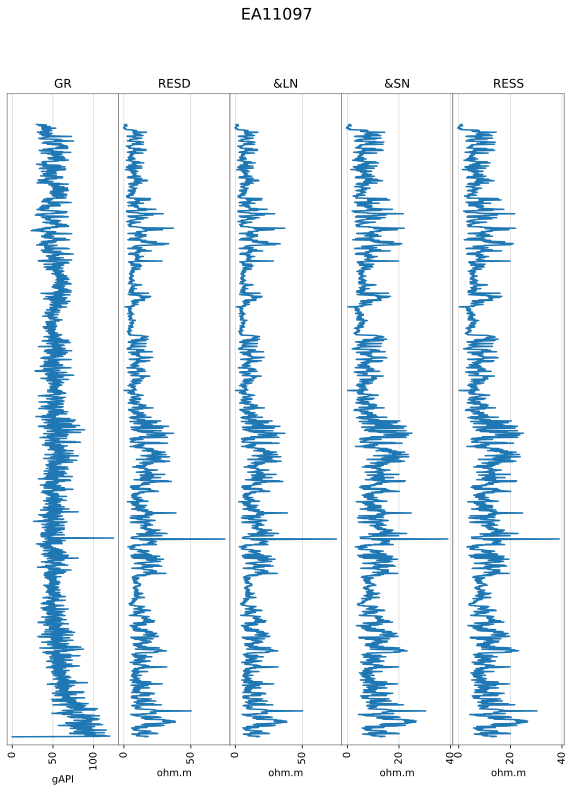

In [9]:
well.plot()

### Let's display the selected well curves, say GR, SP, Rhob and DT

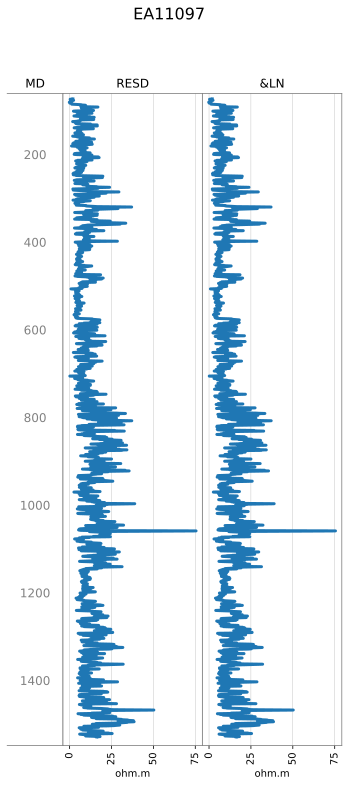

In [15]:
tracks=["MD","RESD","&LN"]
well.plot(tracks=tracks,lw=3) #line width

### Let's select GR curve to process

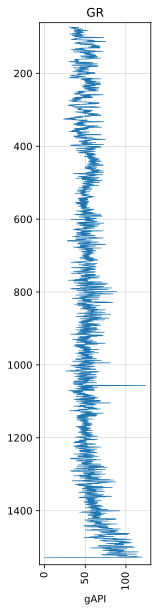

In [20]:
well.data["GR"].plot(lw=0.7)

### We can display information about GR log curve as follows

In [21]:
well.data["GR"]

Curve([nan, nan, nan, ..., nan, nan, nan])

### We can display the start and end depth of the GR log curve from LAS Files

In [22]:
well.data["GR"].start,well.data["GR"].stop

(60.96, 1548.384000000001)

### We can output the value of GR curve at any desired depth, say at 1000 depth unit MD

In [24]:
well.data["GR"].read_at(1200)

48.06008556711709

### We can also print a summary statistics of GR curve

In [25]:
well.data["GR"].describe()

{'samples': 9761,
 'nulls': 206,
 'mean': 53.927675281302854,
 'min': 0.0060000001,
 'max': 124.38829803}

### Another method to print summary statistic for any curve (GR in this case) is by using get_stats option

In [28]:
well.data["GR"].get_stats()

{'samples': 9761,
 'nulls': 206,
 'mean': 53.927675281302854,
 'min': 0.0060000001,
 'max': 124.38829803}

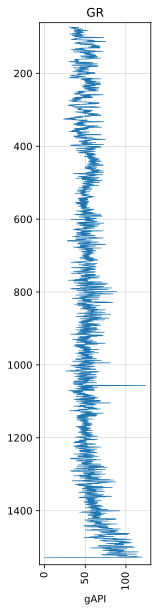

In [30]:
### Let's Despike GR curve
# Display GR curve first to break the spiking parameters required
well.data["GR"].plot(lw=0.7)

### Despiking is controlled by two parameters, window_length and z. We will plot both original and despiked version of log curves in the same track for comparison

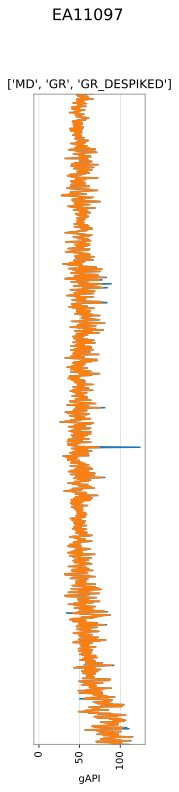

In [47]:
well.data["GR_DESPIKED"]=well.data["GR"].despike(window_length=50,z=2)
well.plot(tracks=[["MD","GR","GR_DESPIKED"]],extents=(500,1525))

### Create a color filled version of any log

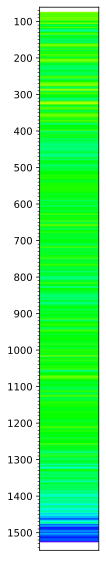

In [48]:
well.data["GR"].plot_2d(cmap="gist_rainbow")

### Let's generate a subset of despiked GR curve between say 500-1500

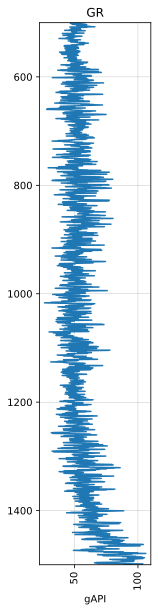

In [50]:
GR_SELECTED=well.data["GR_DESPIKED"].to_basis(start=500,stop=1500)
GR_SELECTED.plot()

### We can color fill the above log from left to rigth edge within the defined x limits

(20.0, 150.0)

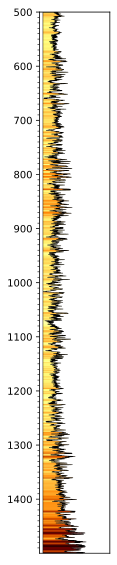

In [57]:
(GR_SELECTED).plot_2d(cmap="afmhot_r",curve=True,lw=0.5,edgecolor="k")
plt.xlim(20,150) # a color filled version between 20 API to 170 API is display